<a href="https://colab.research.google.com/github/Ygarkakoito/nlp/blob/main/%D0%95%D0%B3%D0%BE%D1%80%D0%BE%D0%B2%D0%B0_%D0%9F%D0%9821_2_%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80_0_text_preprocessing_and_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Предобработка текста

## Часть 1

### Токенизация

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data = "All work and no play makes jack a dull boy, all work and no play"
tokens = word_tokenize(data.lower())
print(tokens)

['all', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy', ',', 'all', 'work', 'and', 'no', 'play']


In [ ]:
print(sent_tokenize("I was going home when she rung. It was a surprise."))

['I was going home when she rung.', 'It was a surprise.']


[<img src="https://raw.githubusercontent.com/natasha/natasha-logos/master/natasha.svg">](https://github.com/natasha/natasha)

[Razdel](https://natasha.github.io/razdel/)

In [ ]:
!pip install -q razdel

In [ ]:
from razdel import tokenize, sentenize
text = 'Кружка-термос на 0.5л (50/64 см³, 516;...)'
list(tokenize(text))

[Substring(0, 13, 'Кружка-термос'),
 Substring(14, 16, 'на'),
 Substring(17, 20, '0.5'),
 Substring(20, 21, 'л'),
 Substring(22, 23, '('),
 Substring(23, 28, '50/64'),
 Substring(29, 32, 'см³'),
 Substring(32, 33, ','),
 Substring(34, 37, '516'),
 Substring(37, 38, ';'),
 Substring(38, 41, '...'),
 Substring(41, 42, ')')]

#### Регулярные выражения

Исчерпывающий пост https://habr.com/ru/post/349860/

In [ ]:
import re
word = 'supercalifragilisticexpialidocious'
re.findall('[abc]|up|super', word)

['super', 'c', 'a', 'a', 'c', 'a', 'c']

In [ ]:
re.findall('\d{1,3}', 'These are some numbers: 49 and 432312')

['49', '432', '312']

In [ ]:
re.sub('[,\.?!]','','How, to? split. text!')

'How to split text'

In [ ]:
re.sub('[^A-z]',' ','I 123 can 45 play 67 football').split()

['I', 'can', 'play', 'football']

### Удаление неинформативных слов

#### N-граммы

<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--466CQV1q--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_66%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/78nf1vryed8h1tz05fim.gif" height=400>

In [ ]:
unigram = list(nltk.ngrams(tokens, 1))
bigram = list(nltk.ngrams(tokens, 2))
print(unigram[:5])
print(bigram[:5])

[('all',), ('work',), ('and',), ('no',), ('play',)]
[('all', 'work'), ('work', 'and'), ('and', 'no'), ('no', 'play'), ('play', 'makes')]


In [ ]:
from nltk import FreqDist
print('Популярные униграммы: ', FreqDist(unigram).most_common(5))
print('Популярные биграммы: ', FreqDist(bigram).most_common(5))

Популярные униграммы:  [(('all',), 2), (('work',), 2), (('and',), 2), (('no',), 2), (('play',), 2)]
Популярные биграммы:  [(('all', 'work'), 2), (('work', 'and'), 2), (('and', 'no'), 2), (('no', 'play'), 2), (('play', 'makes'), 1)]


#### Стоп-слова

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stopWords = set(stopwords.words('english'))
print(stopWords)

{'against', 'until', 'few', 'below', "needn't", 'just', 'himself', 'ain', 'how', 'above', 'our', 'his', "it's", 'it', 's', 'now', 'wasn', 'where', 'are', 'been', 'didn', 'did', 'yourselves', 'they', "weren't", 'you', 'off', "didn't", 'isn', 're', 'him', 'doesn', "don't", "hadn't", 'while', 'yourself', 'those', 'when', 'o', 'any', 'them', 'will', 'hadn', 'same', "that'll", 'between', 'down', "you'd", 'why', 'mustn', "you'll", 'ourselves', 'very', 'an', 'by', 'm', 'yours', 'so', "wasn't", 'again', 'having', 'she', 'what', 'be', 'on', 'under', "couldn't", 'about', 'during', 'such', 'can', 'if', "aren't", "wouldn't", 'but', "shan't", 'ma', 'or', 'herself', 'out', 'here', 'theirs', 'their', "you're", 'should', 'other', 'too', 'after', "she's", "doesn't", "won't", 'whom', 'nor', 'of', 'don', 'then', 'weren', 'themselves', 'most', 'do', 'both', 'does', 'more', 'hers', "mightn't", 'from', 'am', 'll', 'has', 'we', 'shan', 'd', 'than', 'at', 'own', 'myself', 'aren', 'its', 'your', "haven't", 'fu

In [ ]:
print([word for word in tokens if word not in stopWords])

['work', 'play', 'makes', 'jack', 'dull', 'boy', ',', 'work', 'play']


In [ ]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


#### Стемминг vs Лемматизация
* ‘Caring’ -> Лемматизация -> ‘Care’
* ‘Caring’ -> Стемминг -> ‘Car’

### Стемминг
* процесс нахождения основы слова для заданного исходного слова

In [ ]:
from nltk.stem import PorterStemmer, SnowballStemmer
words = ["game", "gaming", "gamed", "games", "compacted"]
words_ru = ['корова', 'мальчики', 'мужчины', 'столом', 'убежала']

In [ ]:
ps = PorterStemmer()
list(map(ps.stem, words))

['game', 'game', 'game', 'game', 'compact']

In [ ]:
ss = SnowballStemmer(language='russian')
list(map(ss.stem, words_ru))

['коров', 'мальчик', 'мужчин', 'стол', 'убежа']

### Лематизация
* процесс приведения словоформы к лемме — её нормальной (словарной) форме

In [ ]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""

raw_ru = """Не существует научных доказательств в пользу эффективности НЛП, оно
признано псевдонаукой. Систематические обзоры указывают, что НЛП основано на
устаревших представлениях об устройстве мозга, несовместимо с современной
неврологией и содержит ряд фактических ошибок."""

In [ ]:
!pip install -q pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 57.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# 1
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
pymorphy_results = list(map(lambda x: morph.parse(x), raw_ru.split(' ')))
print(' '.join([res[0].normal_form for res in pymorphy_results]))

не существовать научный доказательство в польза эффективность нлп, оно
признать псевдонаукой. систематический обзор указывают, что нлп основать на
устаревший представление о устройство мозга, несовместимый с современной
неврология и содержать ряд фактический ошибок.


In [ ]:
# 2
import spacy
nlp = spacy.load('en_core_web_sm')
spacy_results = nlp(raw)
print(' '.join([token.lemma_ for token in spacy_results]))

DENNIS : listen , strange woman lie in pond distribute sword 
 be no basis for a system of government .   Supreme executive power derive from 
 a mandate from the masse , not from some farcical aquatic ceremony .


[Сравнение PyMorphy2 и PyMystem3](https://habr.com/ru/post/503420/)

### Part-of-Speech

In [ ]:
# 1
[(res[0].normal_form, res[0].tag) for res in pymorphy_results[:9]]

[('не', OpencorporaTag('PRCL')),
 ('существовать', OpencorporaTag('VERB,impf,intr sing,3per,pres,indc')),
 ('научный', OpencorporaTag('ADJF,Qual plur,gent')),
 ('доказательство', OpencorporaTag('NOUN,inan,neut plur,gent')),
 ('в', OpencorporaTag('PREP')),
 ('польза', OpencorporaTag('NOUN,inan,femn sing,accs')),
 ('эффективность', OpencorporaTag('NOUN,inan,femn sing,gent')),
 ('нлп,', OpencorporaTag('UNKN')),
 ('оно\nпризнать', OpencorporaTag('PRTS,perf,past,pssv neut,sing'))]

In [ ]:
# 2
[(token.lemma_, token.pos_) for token in spacy_results[:7]]

[('DENNIS', 'PROPN'),
 (':', 'PUNCT'),
 ('listen', 'VERB'),
 (',', 'PUNCT'),
 ('strange', 'ADJ'),
 ('woman', 'NOUN'),
 ('lie', 'VERB')]

In [ ]:
!pip install -q rnnmorph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


In [ ]:
# 3
from rnnmorph.predictor import RNNMorphPredictor
predictor = RNNMorphPredictor(language="ru")
rnnmorph_result = predictor.predict(raw_ru.split(' '))
[(token.normal_form, token.pos, token.tag) for token in rnnmorph_result[:7]]

1/1 [==============================] - 2s 2s/step


[('не', 'PART', '_'),
 ('существовать',
  'VERB',
  'Mood=Ind|Number=Sing|Person=3|Tense=Notpast|VerbForm=Fin|Voice=Act'),
 ('научный', 'ADJ', 'Case=Gen|Degree=Pos|Number=Plur'),
 ('доказательство', 'NOUN', 'Case=Gen|Gender=Neut|Number=Plur'),
 ('в', 'ADP', '_'),
 ('польза', 'NOUN', 'Case=Acc|Gender=Fem|Number=Sing'),
 ('эффективность', 'NOUN', 'Case=Gen|Gender=Fem|Number=Sing')]

### Named entities recognition

In [ ]:
doc = nlp('Apple is looking at buying U.K. startup for $1 billion')

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


## Часть 2

### Задача классификации

#### 20 newsgroups
Датасет с 18000 новостей, сгруппированных по 20 темам.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

In [ ]:
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
newsgroups_train.filenames.shape

(11314,)

#### Выполните классификацию текста на подвыборке из 4 тем новостей 3 методами машинного обучения. <br>В качестве метрики возьмите матрицу ошибок. <br>Сделайте выводы по полученным результатам

In [ ]:
categories = ['alt.atheism', 'talk.religion.misc',
              'comp.graphics', 'sci.space']

# Тренировочная выборка
newsgroups_train = fetch_20newsgroups(subset='train',
                                      categories=categories)
newsgroups_train.filenames.shape

(2034,)

In [ ]:
print(newsgroups_train.data[0])

From: rych@festival.ed.ac.uk (R Hawkes)
Subject: 3DS: Where did all the texture rules go?
Lines: 21

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

Rycharde Hawkes				email: rych@festival.ed.ac.uk
Virtual Environment Laboratory
Dept. of Psychology			Tel  : +44 31 650 3426
Univ. of Edinburgh			Fax  : +44 31 667 0150



In [ ]:
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(newsgroups_train.data)
X_test = tfidf_vectorizer.transform(newsgroups_test.data)

In [ ]:
y_train = newsgroups_train.target
y_test = newsgroups_test.target

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

#### Метод 1: Наивный Байесовский Классификатор

In [ ]:
nb_clf = MultinomialNB().fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)
nb_confusion_matrix = confusion_matrix(y_test, nb_pred)

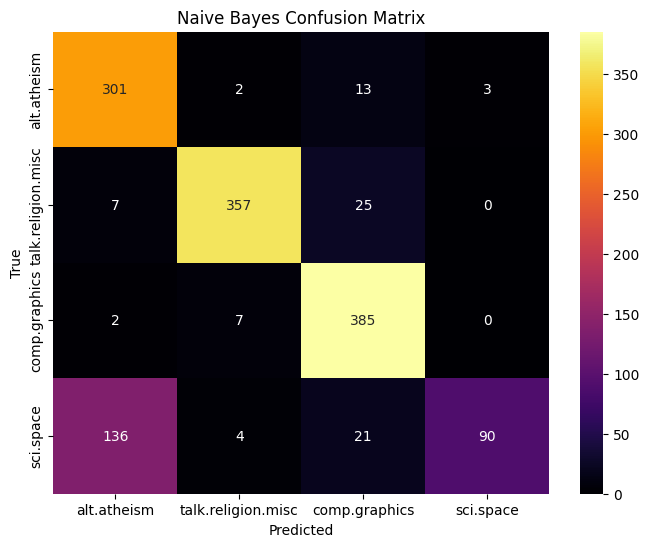

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(nb_confusion_matrix, annot=True, fmt='d', cmap='inferno', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.67      0.94      0.79       319
           1       0.96      0.92      0.94       389
           2       0.87      0.98      0.92       394
           3       0.97      0.36      0.52       251

    accuracy                           0.84      1353
   macro avg       0.87      0.80      0.79      1353
weighted avg       0.87      0.84      0.82      1353



macro f1 - 0.84

Хуже всего предсказывается четвертый класс (f1 - 0.52): 136 образцов были ошибочно классифицированы как первый класс, 4 - как второй класс, и 21 - как третий класс.

#### Метод 2: Метод опорных векторов

In [ ]:
svm_clf = SVC().fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_confusion_matrix = confusion_matrix(y_test, svm_pred)

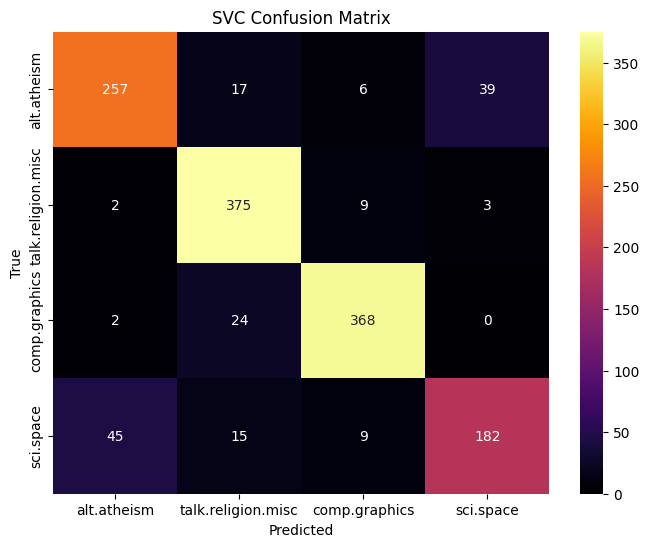

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(svm_confusion_matrix, annot=True, fmt='d', cmap='inferno', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVC Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       319
           1       0.87      0.96      0.91       389
           2       0.94      0.93      0.94       394
           3       0.81      0.73      0.77       251

    accuracy                           0.87      1353
   macro avg       0.87      0.86      0.86      1353
weighted avg       0.87      0.87      0.87      1353



macro f1 - 0.87

Хуже всего предсказывается четвертый класс (f1 - 0.77): 45 образцов были ошибочно классифицированы как первый класс, 15 - как второй класс, и 9 - как третий класс.

#### Метод 3: Случайный лес

In [ ]:
rf_clf = RandomForestClassifier().fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_confusion_matrix = confusion_matrix(y_test, rf_pred)

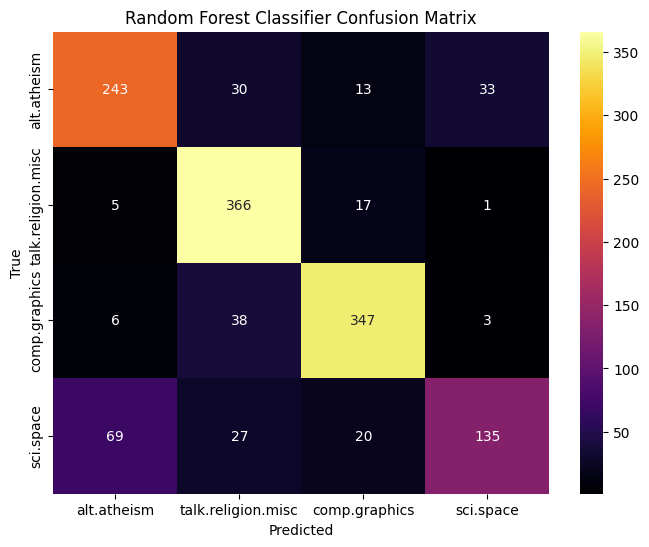

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion_matrix, annot=True, fmt='d', cmap='inferno', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       319
           1       0.79      0.94      0.86       389
           2       0.87      0.88      0.88       394
           3       0.78      0.54      0.64       251

    accuracy                           0.81      1353
   macro avg       0.80      0.78      0.78      1353
weighted avg       0.81      0.81      0.80      1353



Макро F1-мера составляет 0.81, что указывает на то, что четвертый класс имеет самый низкий уровень предсказания (F1-мера 0.81): 69 примеров были неверно классифицированы как первый класс, 27 - как второй класс и 20 - как третий класс.

Итоговый вывод: Наилучшая модель, оцениваемая по метрике макро F1 (0.87), - это метод опорных векторов.

Основной проблемой является четвертый класс, который хуже всего предсказывается и часто путается с первым классом.

Для решения этой проблемы можно попробовать увеличить вес (sample_weight) для четвертого класса.